In [1]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from ddgs import DDGS
import os
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [41]:
import numpy as np
import matplotlib.pyplot as plt


def show_channel_grids(img, title="Channel View"):
    """
    Display a 10x10x3 image as three side-by-side grids showing R, G, B values.
    Each cell shows the numeric value with a white background and grid lines.
    
    Usage:
        img = np.zeros((10, 10, 3), dtype=np.uint8)
        show_channel_grids(img)
    """
    channel_names = ['Red', 'Green', 'Blue']
    channel_colors = ['#ffcccc', '#ccffcc', '#ccccff']  # light tints for headers

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    for ch, ax in enumerate(axes):
        data = img[:, :, ch]

        # White background
        ax.imshow(np.ones((10, 10)), cmap='gray', vmin=0, vmax=1,
                  extent=[-0.5, 9.5, 9.5, -0.5])

        # Place numbers
        for i in range(10):
            for j in range(10):
                val = int(data[i, j])
                ax.text(j, i, str(val), ha='center', va='center',
                        fontsize=9, fontweight='bold')

        # Grid lines
        ax.set_xticks(np.arange(-0.5, 10, 1), minor=False)
        ax.set_yticks(np.arange(-0.5, 10, 1), minor=False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, color='black', linewidth=0.5)
        ax.set_xlim(-0.5, 9.5)
        ax.set_ylim(9.5, -0.5)
        ax.set_title(channel_names[ch], fontsize=14, color=channel_colors[ch],
                     fontweight='bold', backgroundcolor=channel_colors[ch].replace('cc', '33'))
        ax.tick_params(length=0)

    plt.tight_layout()
    plt.show()


def show_image_and_grids(img, title="Image + Channels"):
    """
    Display the actual image alongside the three channel grids.
    Top: the rendered image (scaled up so you can see pixels).
    Bottom: R, G, B numeric grids.
    
    Usage:
        img = np.zeros((10, 10, 3), dtype=np.uint8)
        show_image_and_grids(img)
    """
    channel_names = ['Red', 'Green', 'Blue']

    fig = plt.figure(figsize=(18, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # Top: rendered image
    ax_img = fig.add_subplot(2, 1, 1)
    ax_img.imshow(img.astype(np.uint8), interpolation='nearest')
    ax_img.set_title("Rendered Image", fontsize=14)
    ax_img.axis('off')

    # Bottom: three channel grids
    for ch in range(3):
        ax = fig.add_subplot(2, 3, 4 + ch)
        data = img[:, :, ch]

        ax.imshow(np.ones((10, 10)), cmap='gray', vmin=0, vmax=1,
                  extent=[-0.5, 9.5, 9.5, -0.5])

        for i in range(10):
            for j in range(10):
                val = int(data[i, j])
                ax.text(j, i, str(val), ha='center', va='center',
                        fontsize=9, fontweight='bold')

        ax.set_xticks(np.arange(-0.5, 10, 1))
        ax.set_yticks(np.arange(-0.5, 10, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, color='black', linewidth=0.5)
        ax.set_xlim(-0.5, 9.5)
        ax.set_ylim(9.5, -0.5)
        ax.set_title(channel_names[ch], fontsize=14)
        ax.tick_params(length=0)

    plt.tight_layout()
    plt.show()


def show_before_after(before, after, op_name="Operation"):
    """
    Show before and after images with their channel grids.
    Perfect for visualizing what a NumPy operation did.
    
    Usage:
        before = my_image.copy()
        after = my_image.copy()
        after[:, :, 0] = 0  # zero out red
        show_before_after(before, after, "Zero Red Channel")
    """
    channel_names = ['Red', 'Green', 'Blue']

    # fig = plt.figure(figsize=(18, 16))
    # fig.suptitle(f"Before vs After: {op_name}", fontsize=16, fontweight='bold')

    # for col, (img, label) in enumerate([(before, "Before"), (after, "After")]):
    #     # Image
    #     ax_img = fig.add_subplot(3, 2, col + 1)
    #     ax_img.imshow(img.astype(np.uint8), interpolation='nearest')
    #     ax_img.set_title(label, fontsize=14, fontweight='bold')
    #     ax_img.axis('off')

    #     # Channel grids
    #     for ch in range(3):
    #         ax = fig.add_subplot(3, 6, 7 + col * 3 + ch)  # row 2
    #         if ch < 3:
    #             ax2 = fig.add_subplot(3, 6, 13 + col * 3 + ch)  # row 3... reuse

    #         data = img[:, :, ch]
    #         target_ax = fig.add_subplot(3, 6, (7 + ch + col * 3) if ch < 2 else (7 + ch + col * 3))

    # Simpler approach: just do two rows
    fig, axes = plt.subplots(2, 4, figsize=(22, 10))
    fig.suptitle(f"Before vs After: {op_name}", fontsize=16, fontweight='bold')

    for row, (img, label) in enumerate([(before, "Before"), (after, "After")]):
        # Image
        axes[row, 0].imshow(img.astype(np.uint8), interpolation='nearest')
        axes[row, 0].set_title(f"{label} (Image)", fontsize=12)
        axes[row, 0].axis('off')

        # Channels
        for ch in range(3):
            ax = axes[row, ch + 1]
            data = img[:, :, ch]

            ax.imshow(np.ones((10, 10)), cmap='gray', vmin=0, vmax=1,
                      extent=[-0.5, 9.5, 9.5, -0.5])

            for i in range(10):
                for j in range(10):
                    val = int(data[i, j])
                    ax.text(j, i, str(val), ha='center', va='center',
                            fontsize=7, fontweight='bold')

            ax.set_xticks(np.arange(-0.5, 10, 1))
            ax.set_yticks(np.arange(-0.5, 10, 1))
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.grid(True, color='black', linewidth=0.5)
            ax.set_xlim(-0.5, 9.5)
            ax.set_ylim(9.5, -0.5)
            ax.set_title(f"{label} {channel_names[ch]}", fontsize=11)
            ax.tick_params(length=0)

    plt.tight_layout()
    plt.show()

def show_rgb_grid(img, title="RGB Grid"):
    """
    Display a single 10x10 grid where each cell shows r,g,b values.
    
    Usage:
        img = np.zeros((10, 10, 3), dtype=np.uint8)
        show_rgb_grid(img)
    """
    fig, (ax_img, ax) = plt.subplots(1, 2, figsize=(18, 8),
                                      gridspec_kw={'width_ratios': [1, 2]})
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # Left: rendered image
    ax_img.imshow(img.astype(np.uint8), interpolation='nearest')
    ax_img.set_title("Image", fontsize=14)
    ax_img.axis('off')

    # Right: white background grid
    ax.imshow(np.ones((10, 10)), cmap='gray', vmin=0, vmax=1,
              extent=[-0.5, 9.5, 9.5, -0.5])

    for i in range(10):
        for j in range(10):
            r = int(img[i, j, 0])
            g = int(img[i, j, 1])
            b = int(img[i, j, 2])
            ax.text(j, i, f"{r},{g},{b}", ha='center', va='center',
                    fontsize=7, fontweight='bold')

    ax.set_xticks(np.arange(-0.5, 10, 1))
    ax.set_yticks(np.arange(-0.5, 10, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color='black', linewidth=0.5)
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(9.5, -0.5)
    ax.tick_params(length=0)

    plt.tight_layout()
    plt.show()


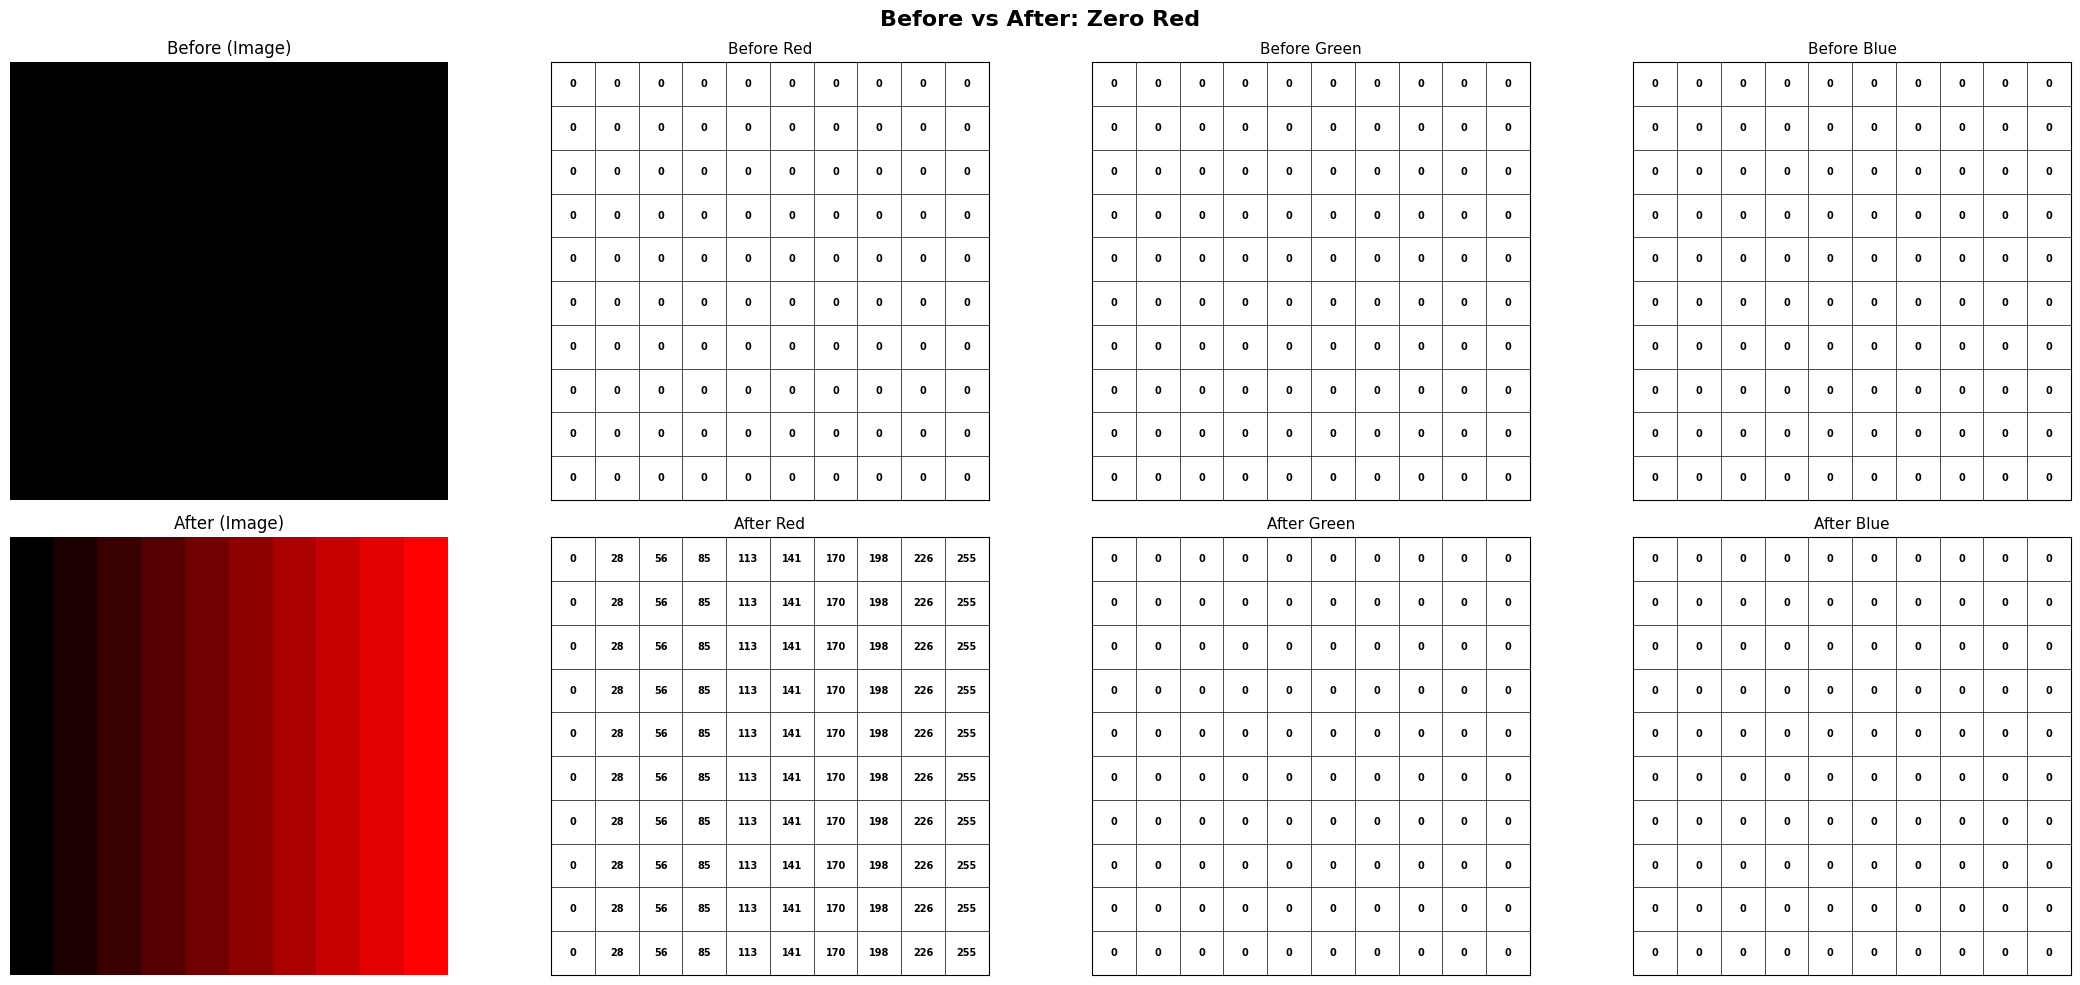

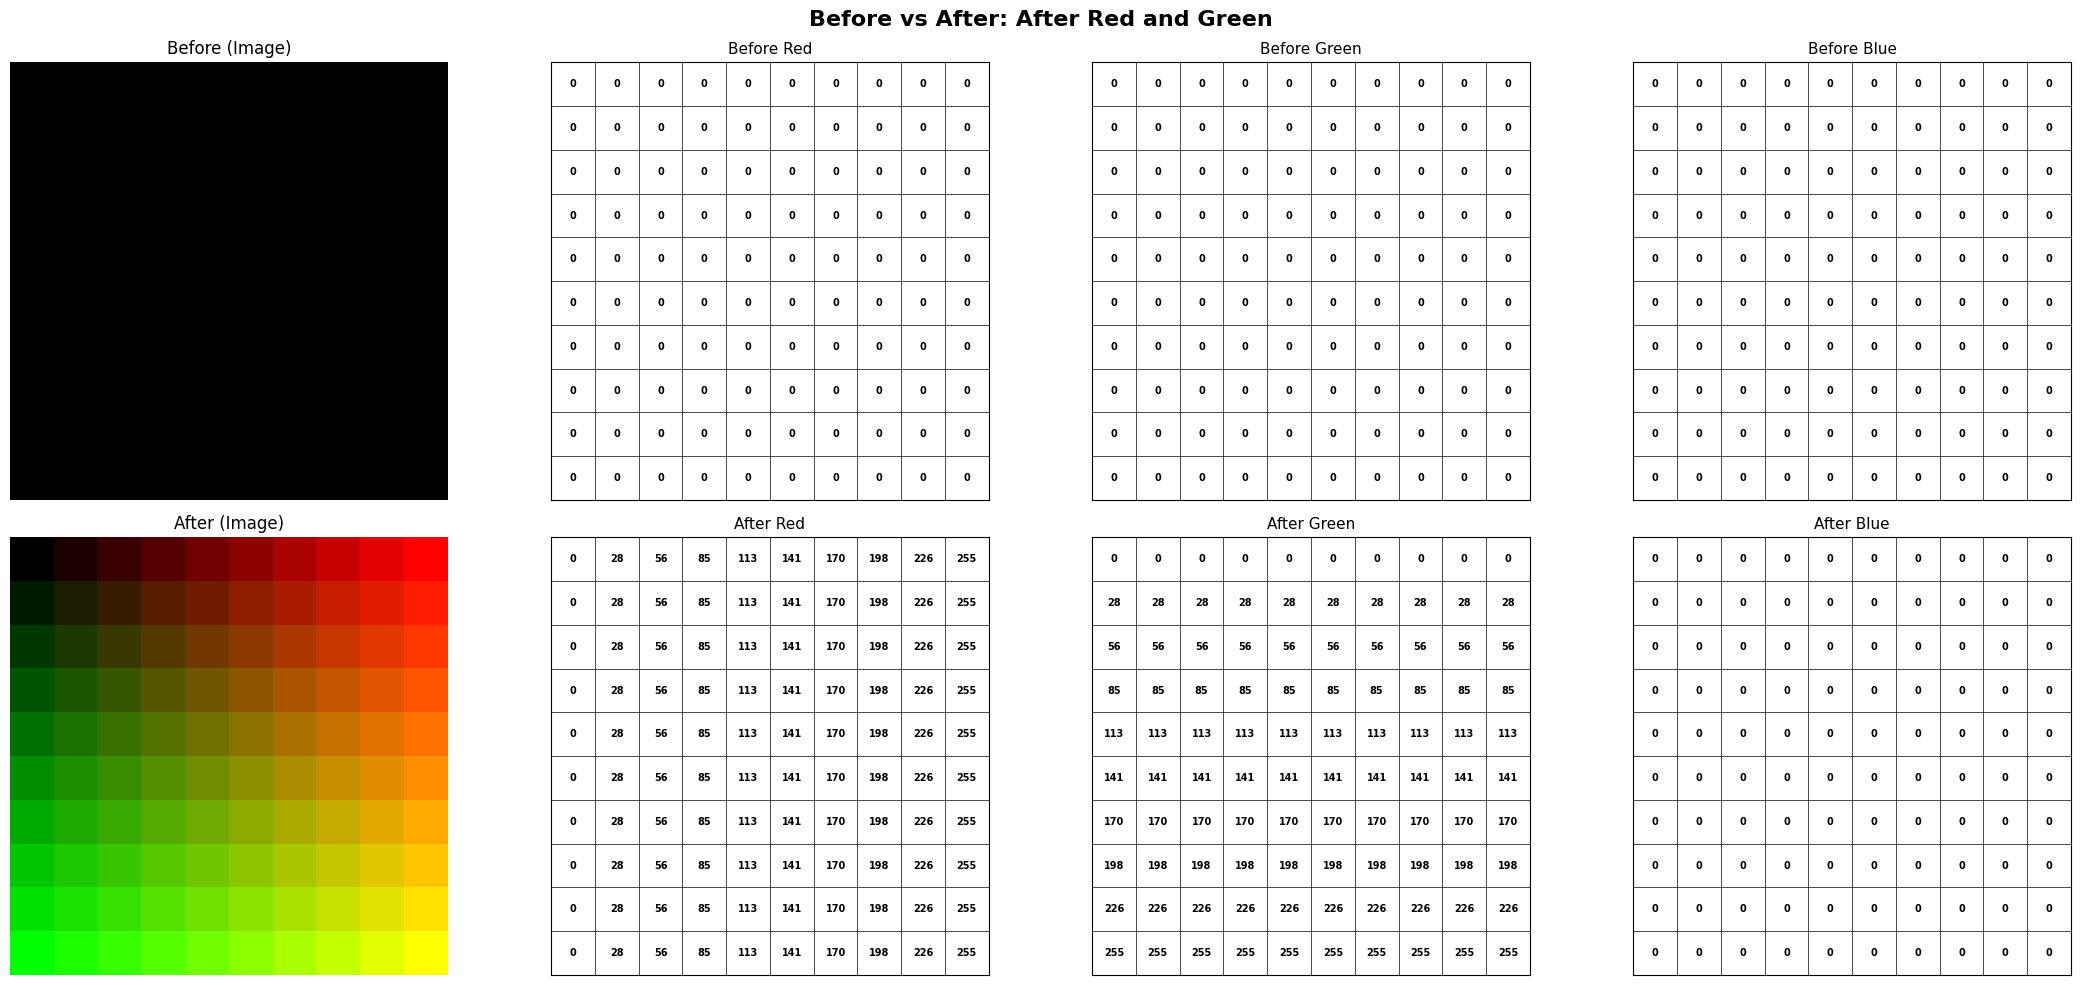

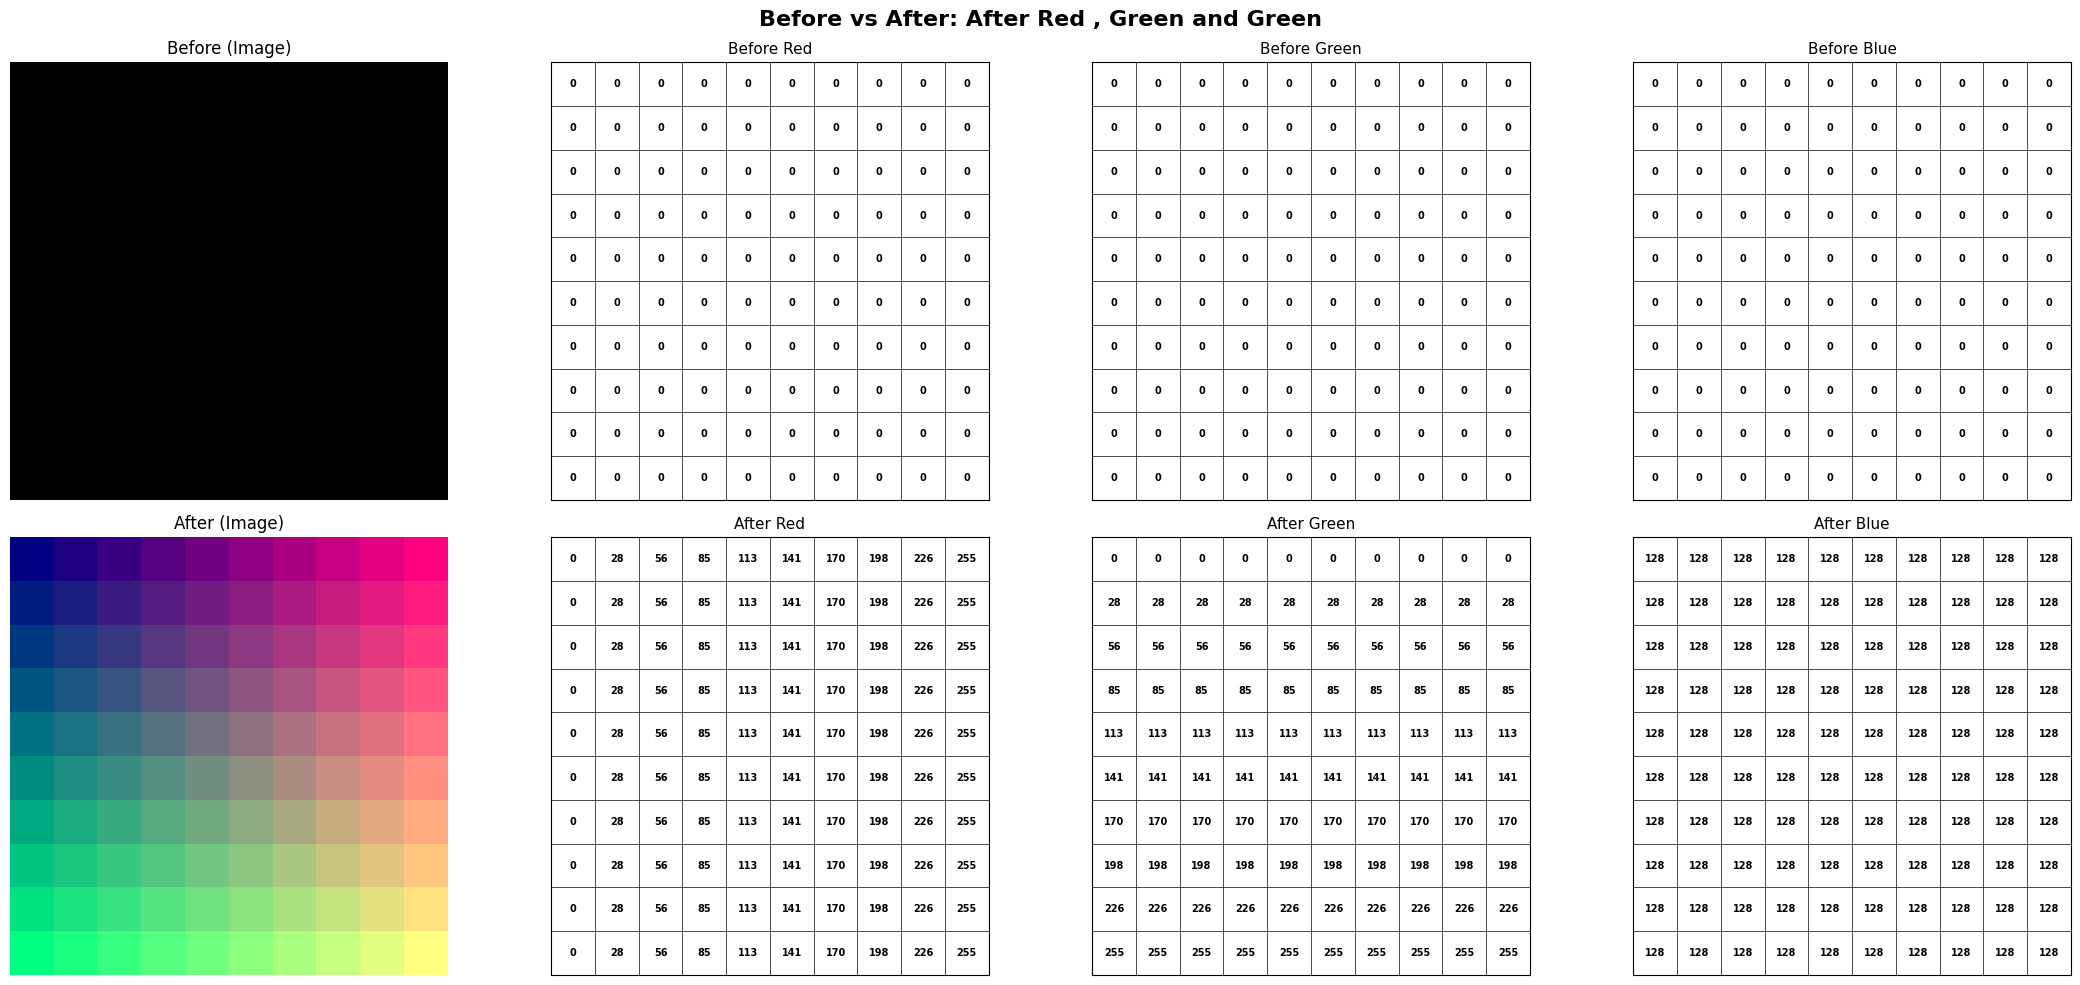

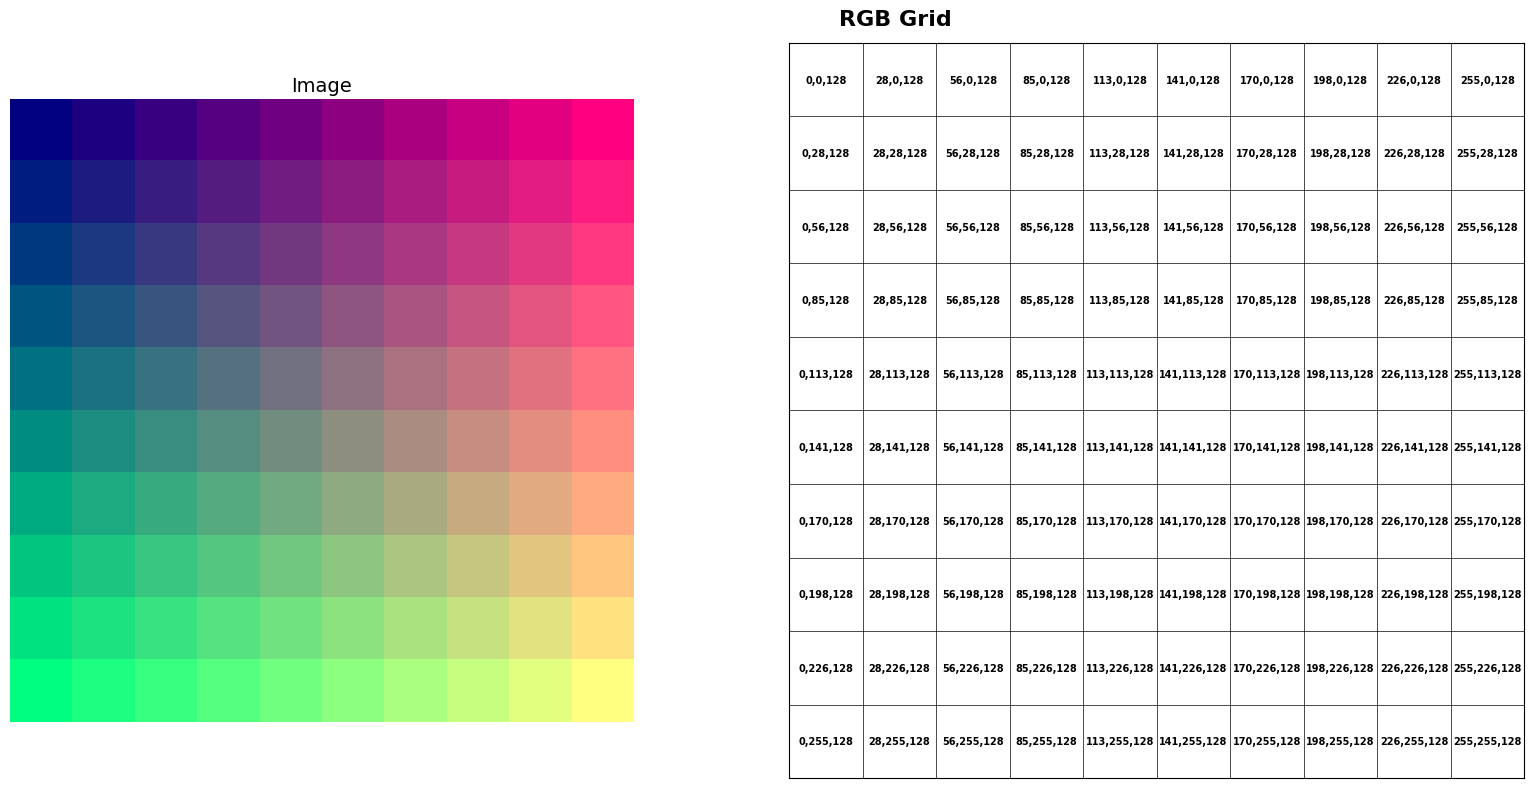

In [47]:
img = np.zeros((10, 10, 3), dtype=np.uint8)
vals = np.linspace(0,255,10)
before_red = img.copy()
img[:,:,0] = img[:,:,0] + vals
after_red_bg = img.copy()

show_before_after(before_red, after_red_bg, "Zero Red")

vals = np.expand_dims(vals, axis=-1)
img[:,:,1] = img[:,:,1] + vals
after_red_bb = img.copy()

show_before_after(before_red, after_red_bb, "After Red and Green")

img[:,:,2] = img[:,:,2] + 128
show_before_after(before_red, img, "After Red , Green and Green")


show_rgb_grid(img)